# **Visualização dos dados do SINAN (2007-2023) - Aranha**

# **Inicializando os dados**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

In [2]:
!pip install -q gdown
import gdown

In [3]:
url = 'https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ'
output = 'dados.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=1UGrPGCw_wgOjoVPVHorx4KxumrCaD9UQ
To: /content/dados.csv
100%|██████████| 73.6M/73.6M [00:00<00:00, 79.3MB/s]


'dados.csv'

In [4]:
df = pd.read_csv('dados.csv', sep=',', encoding='latin1')
df.head()

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
0,2007-01-25,200704,2007,35,350280,1958.0,4048,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,2007-01-29,200705,2007,35,354850,1960.0,4046,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,NaN
2,2007-01-22,200704,2007,35,351660,NaN,4018,M,6.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,2007-01-25,200704,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,2007-01-03,200701,2007,35,351660,1988.0,4018,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0


In [5]:
df.columns

Index(['DT_NOTIFIC', 'SEM_NOT', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP',
       'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO', 'CS_GESTANT', 'CS_RACA',
       'CS_ESCOL_N', 'ANT_DT_ACI', 'ANT_UF', 'ANT_MUNIC_', 'ANT_TEMPO_',
       'ANT_LOCA_1', 'TP_ACIDENT', 'ANI_TIPO_1', 'ANI_SERPEN', 'ANI_ARANHA',
       'ANI_LAGART', 'TRA_CLASSI', 'CON_SOROTE', 'NU_AMPOLAS', 'NU_AMPOL_1',
       'NU_AMPOL_8', 'NU_AMPOL_6', 'NU_AMPOL_4', 'NU_AMPO_7', 'NU_AMPO_5',
       'NU_AMPOL_9', 'NU_AMPOL_3', 'DOENCA_TRA', 'EVOLUCAO'],
      dtype='object')

In [6]:
df = df[df['TP_ACIDENT'] == 2]

# **Gerando visualizações gerais**

## Número de casos ao longo do tempo

### Número de acidentes por ano

In [7]:
ano_abs = pd.crosstab(index=df['NU_ANO'], columns='Frequência').reset_index()
ano_abs

col_0,NU_ANO,Frequência
0,2007,2157
1,2008,2484
2,2009,3463
3,2010,3098
4,2011,3284
5,2012,3508
6,2013,4397
7,2014,3501
8,2015,4223
9,2016,4338


In [8]:
fig = px.line(ano_abs, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Acidentes'},
              title='Número de Acidentes por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs['Frequência'])

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Acidentes", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [9]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')
df_obitos = df[df['EVOLUCAO'] == 2]

ano_abs_obitos = pd.crosstab(index=df_obitos['NU_ANO'], columns='Frequência').reset_index()
ano_abs_obitos

col_0,NU_ANO,Frequência
0,2008,1
1,2009,1
2,2015,1
3,2016,1
4,2017,1
5,2018,3
6,2019,1
7,2020,1
8,2021,2
9,2022,1


In [10]:
fig = px.line(ano_abs_obitos, x='NU_ANO', y='Frequência', markers=True,
              labels={'NU_ANO': 'Ano', 'Frequência': 'Número de Óbitos'},
              title='Número de Óbitos por Ano',
              color_discrete_sequence=px.colors.qualitative.Safe,
              text=ano_abs_obitos['Frequência'],

    )

# Adicionar valores nos pontos
fig.update_traces(text=ano_abs_obitos['Frequência'], textposition="top center")

# Ajustar layout
fig.update_layout(xaxis=dict(dtick=1), yaxis_title="Número de Óbitos", xaxis_title="Ano")

# Exibir o gráfico
fig.show()

In [11]:
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']
ano_abs_obitos['Label'] = ano_abs_obitos['Percentual'].map(lambda x: f'{x :.3f}%')

ano_abs_obitos

col_0,NU_ANO,Frequência,Percentual,Label
0,2008,1,0.046361,0.046%
1,2009,1,0.040258,0.040%
2,2015,1,0.028877,0.029%
3,2016,1,0.032279,0.032%
4,2017,1,0.030451,0.030%
5,2018,3,0.085519,0.086%
6,2019,1,0.022743,0.023%
7,2020,1,0.028563,0.029%
8,2021,2,0.047360,0.047%
9,2022,1,0.023052,0.023%


In [12]:
# Calcular proporção de óbitos em relação aos acidentes
ano_abs_obitos['Percentual'] = ano_abs_obitos['Frequência']*100 / ano_abs['Frequência']

# Criar a figura
fig = go.Figure()

# Acidentes em barras
fig.add_trace(go.Bar(
    x=ano_abs['NU_ANO'],
    y=ano_abs['Frequência'],
    name='Acidentes',
    marker_color=px.colors.qualitative.Safe[0],
    text=ano_abs['Frequência'],
    textposition='outside',
    yaxis='y'
))

# Óbitos em proporção (linha)
fig.add_trace(go.Scatter(
    x=ano_abs_obitos['NU_ANO'],
    y=ano_abs_obitos['Percentual'],
    name='Óbitos ',
    mode='lines+markers+text',
    text=ano_abs_obitos['Label'],
    textposition='top center',
    line=dict(color=px.colors.qualitative.Safe[1], width=3),
    marker=dict(size=8),
    yaxis='y2'
))

# Layout com eixo y2 ajustado para proporção (0 a 1)
fig.update_layout(
    title='Acidentes com Animais Peçonhentos e Percentual de Óbitos em SP (2007–2023)',
    xaxis=dict(title='Ano', dtick=1, showgrid=True),  # grade ativada
    yaxis=dict(title='Número de Acidentes', showgrid=True),  # grade ativada
    yaxis2=dict(
        title='Óbitos Relativo ao Acidentes (%)',
        overlaying='y',
        side='right',
        showgrid=True,  # grade ativada
        range=[0, 1]
    ),
    legend=dict(
        title='Indicador',
        orientation='v',
        x=1,
        y=1,
        xanchor='right',
        yanchor='top'
    ),
    barmode='group',
    template='plotly_white'
)


fig.show()


### Número de acidentes por semana epidemiológica


In [13]:
# Removendo espaços em branco, preenchendo valores vazios com '00' e mantendo os dois últimos dígitos
df['SEM_NOT'] = (
    df['SEM_NOT']
    .astype(str)
    .str.strip()               # Remove espaços em branco
    .replace('', '00')          # Substitui valores vazios por '00'
    .str[-2:]                   # Mantém apenas os dois últimos dígitos
    .astype(int)                # Converte de volta para inteiro
)

display(df)

,DT_NOTIFIC,SEM_NOT,NU_ANO,SG_UF_NOT,ID_MUNICIP,ANO_NASC,NU_IDADE_N,CS_SEXO,CS_GESTANT,CS_RACA,...,NU_AMPOL_1,NU_AMPOL_8,NU_AMPOL_6,NU_AMPOL_4,NU_AMPO_7,NU_AMPO_5,NU_AMPOL_9,NU_AMPOL_3,DOENCA_TRA,EVOLUCAO
3,2007-01-25,4,2007,35,351660,1967.0,4039,F,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
41,2007-01-11,2,2007,35,352690,1940.0,4066,M,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
54,2007-01-02,1,2007,35,352690,1986.0,4020,M,6.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
59,2007-01-27,4,2007,35,350410,1996.0,4010,M,6.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
61,2007-01-10,2,2007,35,350410,1943.0,4063,M,6.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
538062,2023-12-31,1,2023,35,354750,1950.0,4073,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538099,2023-12-31,1,2023,35,352170,1969.0,4054,F,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538107,2023-12-31,1,2023,35,352280,1984.0,4039,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1
538110,2023-12-31,1,2023,35,354530,2004.0,4019,M,6.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1


In [14]:
# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "SEM_NOT"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e semana
fig = px.bar(
    filtered_data,
    x="SEM_NOT",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Semana de Notificação",
    labels={"SEM_NOT": "Semana de Notificação", "Casos": "Número de Casos", "NU_ANO":"Ano" },
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

### Número de acidentes por mês

In [15]:
# Extraindo o mês de 'DT_NOT' nas posições 5 e 6
df['MES'] = df['DT_NOTIFIC'].astype(str).str[5:7]

# Agrupando por ano e mês para contar o número de casos
filtered_data = df.groupby(["NU_ANO", "MES"]).size().reset_index(name="Casos")

# Gráfico de barras simples para mostrar casos por ano e mês
fig = px.bar(
    filtered_data,
    x="MES",
    y="Casos",
    color="NU_ANO",
    title="Casos por Ano e Mês de Notificação",
    labels={"MES": "Mês", "Casos": "Número de Casos", "NU_ANO": "Ano"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


## Informações dos acidentes


### Aplicação de soro

In [16]:
soro = pd.crosstab(index=df['CON_SOROTE'], columns='Frequência').reset_index()
soro

col_0,CON_SOROTE,Frequência
0,1.0,5516
1,2.0,62378
2,9.0,7177


In [17]:
soro_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

soro['Soro'] = soro['CON_SOROTE'].map(soro_legend)

# Gráfico de pizza
fig = px.pie(
    soro,
    names='Soro',
    values='Frequência',
    title='Aplicação de soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()


In [18]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
soro_obt = pd.crosstab(index=df_obt['CON_SOROTE'], columns='Frequência').reset_index()
soro_obt

col_0,CON_SOROTE,Frequência
0,1.0,8
1,2.0,7


In [19]:
soro_obt['Percentual'] = (soro_obt['Frequência'] / soro['Frequência']) * 100
soro_obt['Label'] = soro_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
soro_obt['Soro'] = soro_obt['CON_SOROTE'].map(soro_legend)
soro_obt

col_0,CON_SOROTE,Frequência,Percentual,Label,Soro
0,1.0,8,0.145033,0.145%,Sim
1,2.0,7,0.011222,0.011%,Não


In [20]:
# Gráfico de pizza
fig = px.pie(
    soro_obt,
    names='Soro',
    values='Frequência',
    title='Percentual de mortes e soroterapia',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

### Tempo de atendimento

In [21]:
tempo = pd.crosstab(index=df['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo

col_0,ANT_TEMPO_,Frequência
0,1.0,33592
1,2.0,15861
2,3.0,5413
3,4.0,2224
4,5.0,2975
5,6.0,7878
6,9.0,5344


In [22]:
tempo_dict = {
    1: '0 - 1h',
    2: '1 - 3h',
    3: '3 - 6h',
    4: '6 - 12h',
    5: '12 - 24h',
    6: '24h ou mais',
    9: 'Ignorado'
}

tempo['Tempo'] = tempo['ANT_TEMPO_'].map(tempo_dict)
tempo

col_0,ANT_TEMPO_,Frequência,Tempo
0,1.0,33592,0 - 1h
1,2.0,15861,1 - 3h
2,3.0,5413,3 - 6h
3,4.0,2224,6 - 12h
4,5.0,2975,12 - 24h
5,6.0,7878,24h ou mais
6,9.0,5344,Ignorado


In [23]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Frequência',
    title='Número de casos por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [24]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
tempo_obt = pd.crosstab(index=df_obt['ANT_TEMPO_'], columns='Frequência').reset_index()
tempo['Óbitos'] = tempo_obt['Frequência']
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos
0,1.0,33592,0 - 1h,2.0
1,2.0,15861,1 - 3h,1.0
2,3.0,5413,3 - 6h,2.0
3,4.0,2224,6 - 12h,10.0
4,5.0,2975,12 - 24h,NaN
5,6.0,7878,24h ou mais,NaN
6,9.0,5344,Ignorado,NaN


In [25]:
tempo['Percentual'] = tempo['Óbitos'] * 100 / tempo['Frequência']
tempo['Label'] = tempo['Percentual'].apply(lambda x: f'{x:.3f}%')
tempo

col_0,ANT_TEMPO_,Frequência,Tempo,Óbitos,Percentual,Label
0,1.0,33592,0 - 1h,2.0,0.005954,0.006%
1,2.0,15861,1 - 3h,1.0,0.006305,0.006%
2,3.0,5413,3 - 6h,2.0,0.036948,0.037%
3,4.0,2224,6 - 12h,10.0,0.449640,0.450%
4,5.0,2975,12 - 24h,NaN,NaN,nan%
5,6.0,7878,24h ou mais,NaN,NaN,nan%
6,9.0,5344,Ignorado,NaN,NaN,nan%


In [26]:
# Gráfico de pizza
fig = px.pie(
    tempo,
    names='Tempo',
    values='Óbitos',
    title='Número de mortes por tempo de atendimento',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Mostrar porcentagem e rótulo dentro da fatia
fig.update_traces(textinfo='percent+label', textposition='inside')

fig.show()

In [27]:
fig = px.bar(
    tempo,
    x='Tempo',
    y='Percentual',
    title='Taxa de letalidade por tempo de espera',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.show()

### Aplicação de soro e Tempo de espera

In [28]:
# Filtrar valores onde ANT_TEMPO_ ≠ 9
#df_filtrado = df[df['ANT_TEMPO_'] != 9]
#df_filtrado = df_filtrado[df_filtrado['CON_SOROTE'] != 9]

# Gerar a crosstab com os valores válidos
#soro_tempo = pd.crosstab(df_filtrado['ANT_TEMPO_'], df_filtrado['CON_SOROTE'])
soro_tempo = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'])
soro_tempo

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,2081,28649,2862
2.0,1213,13379,1269
3.0,421,4566,426
4.0,222,1805,197
5.0,345,2352,278
6.0,779,6413,686
9.0,306,4149,889


In [29]:
# Renomear o índice (linhas) com tempo_dict
soro_tempo.index = soro_tempo.index.map(tempo_dict)

# Renomear as colunas com soro_dict
soro_tempo.columns = [soro_legend.get(col, col) for col in soro_tempo.columns]
soro_tempo

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,2081,28649,2862
1 - 3h,1213,13379,1269
3 - 6h,421,4566,426
6 - 12h,222,1805,197
12 - 24h,345,2352,278
24h ou mais,779,6413,686
Ignorado,306,4149,889


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

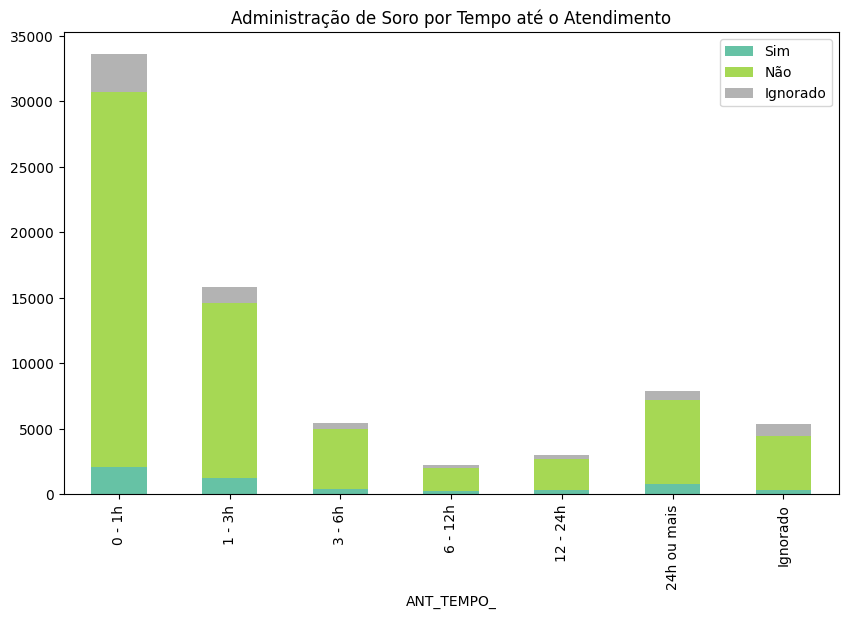

In [30]:
soro_tempo.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [31]:
percentual = soro_tempo.div(soro_tempo.sum(axis=1), axis=0) * 100

percentual_plot = percentual.reset_index().melt(id_vars='ANT_TEMPO_', var_name='Recebeu Soro', value_name='Percentual')

fig = px.bar(
    percentual_plot,
    x='ANT_TEMPO_',
    y='Percentual',
    color='Recebeu Soro',
    title='Percentual de Administração de Soro por Tempo até o Atendimento',
    text=percentual_plot['Percentual'].round(1).astype(str) + '%',
    barmode='stack',
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside')
fig.show()


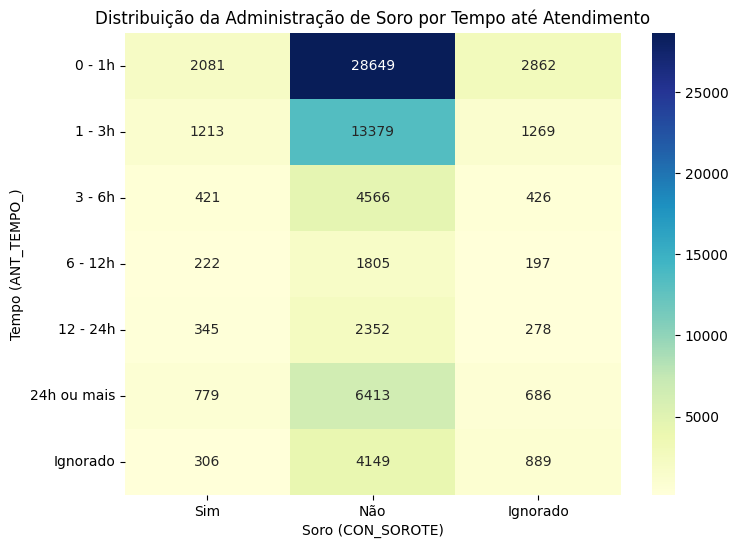

In [32]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [33]:
soro_tempo_N = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='index')
soro_tempo_N

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.061949,0.852852,0.085199
2.0,0.076477,0.843516,0.080008
3.0,0.077776,0.843525,0.078699
4.0,0.099820,0.811601,0.088579
5.0,0.115966,0.790588,0.093445
6.0,0.098883,0.814039,0.087078
9.0,0.057260,0.776385,0.166355


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

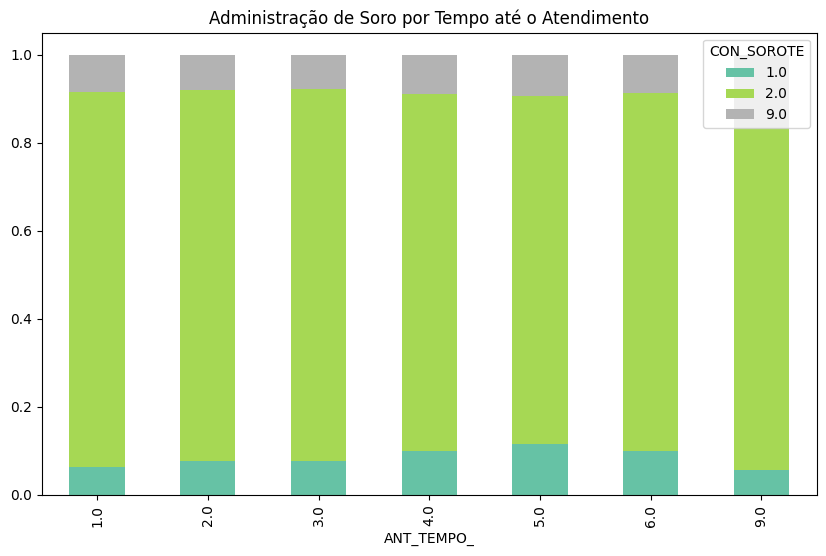

In [34]:
soro_tempo_N.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

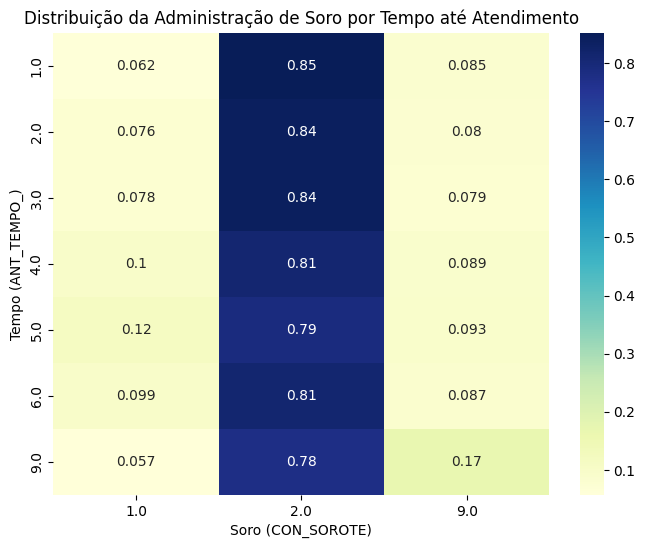

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(soro_tempo_N, annot=True, cmap="YlGnBu")
plt.title("Distribuição da Administração de Soro por Tempo até Atendimento")
plt.ylabel("Tempo (ANT_TEMPO_)")
plt.xlabel("Soro (CON_SOROTE)")
plt.show()


In [36]:
soro_tempo_N2 = pd.crosstab(df['ANT_TEMPO_'], df['CON_SOROTE'], normalize='columns')
soro_tempo_N2

CON_SOROTE,1.0,2.0,9.0
ANT_TEMPO_,,,
1.0,0.387740,0.467258,0.433177
2.0,0.226011,0.218208,0.192069
3.0,0.078442,0.074470,0.064477
4.0,0.041364,0.029439,0.029817
5.0,0.064282,0.038361,0.042077
6.0,0.145146,0.104594,0.103829
9.0,0.057015,0.067669,0.134554


<Axes: title={'center': 'Administração de Soro por Tempo até o Atendimento'}, xlabel='ANT_TEMPO_'>

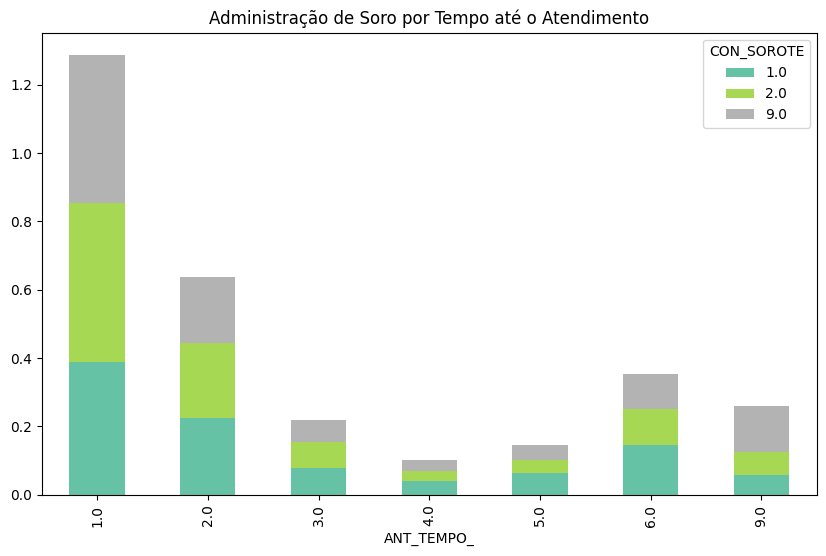

In [37]:
soro_tempo_N2.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2', title='Administração de Soro por Tempo até o Atendimento')

In [38]:
soro_rel_casos = (soro_tempo/len(df)) * 100
soro_rel_casos

,Sim,Não,Ignorado
ANT_TEMPO_,,,
0 - 1h,2.772042,38.162539,3.812391
1 - 3h,1.615804,17.821795,1.690400
3 - 6h,0.560802,6.082242,0.567463
6 - 12h,0.295720,2.404391,0.262418
12 - 24h,0.459565,3.133034,0.370316
24h ou mais,1.037684,8.542580,0.913802
Ignorado,0.407614,5.526768,1.184212


In [39]:
# Transformar o DataFrame para formato longo (long-form)
soro_rel_long = soro_rel_casos.reset_index().melt(
    id_vars='ANT_TEMPO_',
    var_name='Soro',
    value_name='Percentual'
)

# Criar gráfico de barras horizontais empilhadas
fig = px.bar(
    soro_rel_long,
    y='ANT_TEMPO_',
    x='Percentual',
    color='Soro',
    orientation='h',
    text=soro_rel_long['Percentual'].round(2).astype(str) + '%',
    title='Distribuição Percentual dos Casos por Tempo até Atendimento e Administração de Soro',
    color_discrete_sequence=px.colors.qualitative.Safe
)

# Ajustes visuais
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Percentual (%)',
    yaxis_title='Tempo entre Picada e Atendimento',
    barmode='stack',
    legend_title='Recebeu Soro'
)

fig.show()


## Perfil dos pacientes


### Idade dos pacientes

In [40]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4039, 4066, 4020, 4010, 4063, 4025, 4014, 4028, 4009, 4032, 4051,
       4029, 4045, 4054, 4059, 4015, 4017, 4035, 4024, 4082, 4037, 4048,
       4033, 4052, 4018, 4044, 4041, 4038, 4057, 4016, 4030, 4068, 4047,
       4042, 4026, 4031, 4036, 4007, 4006, 4019, 4021, 4064, 4022, 4001,
       4061, 4003, 4056, 4075, 4027, 4040, 4004, 4008, 4076, 4053, 4043,
       4050, 4098, 4023, 4055, 4046, 4049, 4013, 4070, 4072, 4069, 4062,
       4058, 4060, 3007, 4067, 3006, 4078, 4012, 4081, 2000, 4002, 4073,
       4005, 4034, 4080, 4097, 4065, 4011, 4071, 3008, 4079, 4077, 4074,
       3005, 3009, 4085, 3003, 3002, 3010, 2017, 3001, 3011,    8, 4086,
       4094, 4083, 2003, 4089, 4084, 2030, 2014, 3004, 4088,   38, 4093,
       2009, 4090, 4000, 4087, 2008, 2020, 2015, 2001, 2016, 2011, 4092,
       2018, 2006, 4096, 2022, 2038, 2004, 4091, 1005, 2013, 2012, 2026,
       2010, 2005, 2024, 2019, 2028, 2002, 2021, 2007, 4100, 2029, 2027,
       4106, 4099, 4095, 2023])

In [41]:
# Converter para string e manter apenas os que têm 4 dígitos
df = df[df['NU_IDADE_N'].astype(str).str.match(r'^\d{4}$')]

In [42]:
df['NU_IDADE_N'].isna().sum()
df['NU_IDADE_N'].unique()

array([4039, 4066, 4020, 4010, 4063, 4025, 4014, 4028, 4009, 4032, 4051,
       4029, 4045, 4054, 4059, 4015, 4017, 4035, 4024, 4082, 4037, 4048,
       4033, 4052, 4018, 4044, 4041, 4038, 4057, 4016, 4030, 4068, 4047,
       4042, 4026, 4031, 4036, 4007, 4006, 4019, 4021, 4064, 4022, 4001,
       4061, 4003, 4056, 4075, 4027, 4040, 4004, 4008, 4076, 4053, 4043,
       4050, 4098, 4023, 4055, 4046, 4049, 4013, 4070, 4072, 4069, 4062,
       4058, 4060, 3007, 4067, 3006, 4078, 4012, 4081, 2000, 4002, 4073,
       4005, 4034, 4080, 4097, 4065, 4011, 4071, 3008, 4079, 4077, 4074,
       3005, 3009, 4085, 3003, 3002, 3010, 2017, 3001, 3011, 4086, 4094,
       4083, 2003, 4089, 4084, 2030, 2014, 3004, 4088, 4093, 2009, 4090,
       4000, 4087, 2008, 2020, 2015, 2001, 2016, 2011, 4092, 2018, 2006,
       4096, 2022, 2038, 2004, 4091, 1005, 2013, 2012, 2026, 2010, 2005,
       2024, 2019, 2028, 2002, 2021, 2007, 4100, 2029, 2027, 4106, 4099,
       4095, 2023])

In [43]:
def classificar_faixa(valor):
    try:
        valor = int(valor)
        unidade = int(str(valor)[0])
        numero = int(str(valor)[1:])

        # Converter tudo para idade em anos
        if unidade == 1:
            idade = numero / (24 * 365)
        elif unidade == 2:
            idade = numero / 365
        elif unidade == 3:
            idade = numero / 12
        elif unidade == 4:
            idade = numero
        else:
            return "Ignorado"

        # Classificação em faixas de 10 em 10 anos
        if idade < 10:
            return "0-9 anos"
        elif idade < 20:
            return "10-19 anos"
        elif idade < 30:
            return "20-29 anos"
        elif idade < 40:
            return "30-39 anos"
        elif idade < 50:
            return "40-49 anos"
        elif idade < 60:
            return "50-59 anos"
        elif idade < 70:
            return "60-69 anos"
        elif idade < 80:
            return "70-79 anos"
        elif idade < 90:
            return "80-89 anos"
        elif idade < 100:
            return "90-99 anos"
        else:
            return "100 anos ou mais"
    except:
        return "Ignorado"

In [44]:
df['faixa_etaria'] = df['NU_IDADE_N'].apply(classificar_faixa)

In [45]:
casos_idade = pd.crosstab(index=df['faixa_etaria'], columns='Frequência').reset_index()
casos_idade

col_0,faixa_etaria,Frequência
0,0-9 anos,7863
1,10-19 anos,8658
2,100 anos ou mais,3
3,20-29 anos,12257
4,30-39 anos,11728
5,40-49 anos,11206
6,50-59 anos,10543
7,60-69 anos,7850
8,70-79 anos,3899
9,80-89 anos,976


In [46]:
# Gráfico de pizza
fig = px.pie(
    casos_idade,
    names='faixa_etaria',
    values='Frequência',
    title="Distribuição de Casos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [47]:
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])
tabela_evolucao

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,7068,2,1,355
10-19 anos,7743,1,1,440
100 anos ou mais,3,0,0,0
20-29 anos,10932,1,2,628
30-39 anos,10523,0,1,582
40-49 anos,9931,1,4,602
50-59 anos,9449,3,2,546
60-69 anos,7038,2,3,394
70-79 anos,3485,3,0,194


In [48]:
tab_evol = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'], normalize='index')
tab_evol

EVOLUCAO,1,2,3,9
faixa_etaria,,,,
0-9 anos,0.951791,0.000269,0.000135,0.047805
10-19 anos,0.945999,0.000122,0.000122,0.053757
100 anos ou mais,1.000000,0.000000,0.000000,0.000000
20-29 anos,0.945429,0.000086,0.000173,0.054311
30-39 anos,0.947506,0.000000,0.000090,0.052404
40-49 anos,0.942399,0.000095,0.000380,0.057127
50-59 anos,0.944900,0.000300,0.000200,0.054600
60-69 anos,0.946349,0.000269,0.000403,0.052978
70-79 anos,0.946496,0.000815,0.000000,0.052689


In [49]:
# Mapeamento para legenda
evolucao_dict = {
    1: 'Cura',
    2: 'Óbito por acidente',
    3: 'Óbito por outras causas',
    9: 'Ignorado'
}

# Converter EVOLUCAO para numérico (forçando erro para NaN), preencher com 9 e converter para int
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').fillna(9).astype(int)

# Criar tabela cruzada
tabela_evolucao = pd.crosstab(df['faixa_etaria'], df['EVOLUCAO'])

# Renomear colunas com base no dicionário
tabela_evolucao = tabela_evolucao.rename(columns=evolucao_dict)

# Converter para formato longo
tabela_long = tabela_evolucao.reset_index().melt(
    id_vars='faixa_etaria',
    var_name='Evolução',
    value_name='Frequência'
)

# Ordem desejada para faixa etária
ordem_idade = [
    '0-9 anos', '10-19 anos', '20-29 anos', '30-39 anos', '40-49 anos',
    '50-59 anos', '60-69 anos', '70-79 anos', '80-89 anos', '90-99 anos',
    '100 anos ou mais'
]

# Garantir que faixa_etaria está como categoria ordenada
tabela_long['faixa_etaria'] = pd.Categorical(
    tabela_long['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico com ordem forçada no eixo x
fig = px.bar(
    tabela_long,
    x='faixa_etaria',
    y='Frequência',
    color='Evolução',
    title='Distribuição dos Desfechos por Faixa Etária',
    labels={'faixa_etaria': 'Faixa Etária'},
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'faixa_etaria': ordem_idade}  # <- ordem explícita!
)
fig.update_layout(barmode='group')
fig.show()
fig.show()


In [50]:
df['EVOLUCAO'] = pd.to_numeric(df['EVOLUCAO'], errors='coerce').astype('Int64')

# Filtrar apenas os óbitos (EVOLUCAO == 2)
df_obitos = df[df['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_idade = pd.crosstab(index=df_obitos['faixa_etaria'],
                            columns='Óbitos',
                            dropna=False)

tab_obt_idade.reset_index()

col_0,faixa_etaria,Óbitos
0,0-9 anos,2
1,10-19 anos,1
2,20-29 anos,1
3,40-49 anos,1
4,50-59 anos,3
5,60-69 anos,2
6,70-79 anos,3
7,80-89 anos,2


In [51]:
# Garantir que 'faixa_etaria' é uma coluna
if 'faixa_etaria' not in tab_obt_idade.columns:
    tab_obt_idade = tab_obt_idade.reset_index()

# Gráfico de pizza
fig = px.pie(
    tab_obt_idade,
    names='faixa_etaria',
    values='Óbitos',
    title="Distribuição Percentual de Óbitos por Faixa Etária",
    color_discrete_sequence=px.colors.qualitative.Safe,
)


fig.show()

In [52]:
# Garantir que os índices estejam alinhados
tab_obt_idade = tab_obt_idade.copy()
casos_idade = casos_idade.copy()

tab_obt_idade = tab_obt_idade.set_index('faixa_etaria')
casos_idade = casos_idade.set_index('faixa_etaria')

# Calcular o percentual de óbitos por faixa etária
tab_obt_idade['Percentual'] = (
    tab_obt_idade['Óbitos'] * 100 / casos_idade['Frequência']
)

# Formatar o percentual com 3 casas decimais e adicionar símbolo %
tab_obt_idade['Label'] = tab_obt_idade['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar o índice para facilitar visualização e uso no gráfico
tab_obt_idade = tab_obt_idade.reset_index()

# Visualizar tabela final
tab_obt_idade

col_0,faixa_etaria,Óbitos,Percentual,Label
0,0-9 anos,2,0.025436,0.025%
1,10-19 anos,1,0.011550,0.012%
2,20-29 anos,1,0.008159,0.008%
3,40-49 anos,1,0.008924,0.009%
4,50-59 anos,3,0.028455,0.028%
5,60-69 anos,2,0.025478,0.025%
6,70-79 anos,3,0.076943,0.077%
7,80-89 anos,2,0.204918,0.205%


In [53]:
tab_obt_idade['faixa_etaria'] = pd.Categorical(
    tab_obt_idade['faixa_etaria'],
    categories=ordem_idade,
    ordered=True
)

# Gráfico de barras
fig = px.bar(
    tab_obt_idade.sort_values('faixa_etaria'),
    x='faixa_etaria',
    y='Percentual',
    text='Label',
    title='Letalidade por Faixa Etária (%)',
    labels={'faixa_etaria': 'Faixa Etária', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe, # vermelho escuro, cor de alerta
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Faixa Etária')

fig.show()


In [54]:
# Criar uma cópia do DataFrame original para não modificar df diretamente
casos_grupo = df.copy()

# Extrair a idade mínima da faixa etária (ex: '10 a 14' → 10)
casos_grupo['idade_min'] = casos_grupo['faixa_etaria'].str.extract(r'(\d+)').astype(float)

# Classificar em grupos etários personalizados
casos_grupo['grupo_etario'] = np.select(
    condlist=[
        casos_grupo['idade_min'] <= 19,
        casos_grupo['idade_min'] >= 60
    ],
    choicelist=[
        'Crianças e Adolescentes',
        'Idosos'
    ],
    default='Adultos'
)

obitos_grupo = casos_grupo.copy()
casos_grupo = pd.crosstab(index=casos_grupo['grupo_etario'], columns='Frequência').reset_index()
casos_grupo

col_0,grupo_etario,Frequência
0,Adultos,45734
1,Crianças e Adolescentes,16521
2,Idosos,12814


In [55]:
# Gráfico de pizza
fig = px.pie(
    casos_grupo,
    names='grupo_etario',
    values='Frequência',
    title="Frequência de acidentes por grupo etário",
    color_discrete_sequence=px.colors.qualitative.Safe,
)
fig.show()

In [56]:
# Filtrar apenas os óbitos (EVOLUCAO == 2)
obitos_grupo = obitos_grupo[obitos_grupo['EVOLUCAO'] == 2]

# Tabela de frequência de óbitos por faixa etária
tab_obt_grupo = pd.crosstab(index=obitos_grupo['grupo_etario'],
                            columns='Óbitos',
                            dropna=False).reset_index()

tab_obt_grupo

col_0,grupo_etario,Óbitos
0,Adultos,5
1,Crianças e Adolescentes,3
2,Idosos,7


In [57]:
# Garantir cópia dos DataFrames e alinhamento de índice
tab_obt_grupo = tab_obt_grupo.copy()
casos_grupo = casos_grupo.copy()

# Garantir que ambos estejam indexados por 'grupo_etario'
tab_obt_grupo = tab_obt_grupo.set_index('grupo_etario')
casos_grupo = casos_grupo.set_index('grupo_etario')

# Calcular o percentual de óbitos por grupo etário
tab_obt_grupo['Percentual'] = (
    tab_obt_grupo['Óbitos'] * 100 / casos_grupo['Frequência']
)

# Formatar percentual com 3 casas decimais e símbolo %
tab_obt_grupo['Label'] = tab_obt_grupo['Percentual'].apply(lambda x: f'{x:.3f}%')

# Resetar índice para facilitar visualização e uso em gráficos
tab_obt_grupo = tab_obt_grupo.reset_index()

# Exibir a tabela final
tab_obt_grupo

col_0,grupo_etario,Óbitos,Percentual,Label
0,Adultos,5,0.010933,0.011%
1,Crianças e Adolescentes,3,0.018159,0.018%
2,Idosos,7,0.054628,0.055%


In [58]:
# Reforçar o tipo de dado como string (se perdeu no processo anterior)
tab_obt_grupo['grupo_etario'] = tab_obt_grupo['grupo_etario'].astype(str)

# Definir a ordem correta das categorias
ordem_grupo = ['Crianças e Adolescentes', 'Adultos', 'Idosos']
tab_obt_grupo['grupo_etario'] = pd.Categorical(
    tab_obt_grupo['grupo_etario'],
    categories=ordem_grupo,
    ordered=True
)

# Gráfico de barras com Plotly
fig = px.bar(
    tab_obt_grupo.sort_values('grupo_etario'),
    x='grupo_etario',
    y='Percentual',
    text='Label',
    title='Letalidade por Grupo Etário (%)',
    labels={'grupo_etario': 'Grupo Etário', 'Percentual': 'Letalidade (%)'},
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textposition='outside')
fig.update_layout(yaxis_title='Letalidade (%)', xaxis_title='Grupo Etário')

fig.show()


### Raça/Cor

In [59]:
tab_raca = pd.crosstab(index=df['CS_RACA'], columns='Frequência').reset_index()
tab_raca

col_0,CS_RACA,Frequência
0,1.0,48142
1,2.0,3684
2,3.0,613
3,4.0,14337
4,5.0,186
5,9.0,6236


In [60]:
# Dicionário de mapeamento dos códigos
raca_dict = {
    1: 'Branca',
    2: 'Preta',
    3: 'Amarela',
    4: 'Parda',
    5: 'Indígena',
    9: 'Ignorado'
}

# Aplicar o mapeamento à coluna
tab_raca['Raça/Cor'] = tab_raca['CS_RACA'].map(raca_dict)


In [61]:
fig = px.pie(
    tab_raca,
    names='Raça/Cor',
    values='Frequência',
    title='Distribuição de Casos por Raça/Cor',
    color_discrete_sequence=px.colors.qualitative.Safe
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()

In [62]:
df_obt = df.copy()
df_obt = df_obt[df_obt['EVOLUCAO'] == 2]
df_obt_raca = pd.crosstab(index=df_obt['CS_RACA'], columns='Frequência').reset_index()
df_obt_raca

col_0,CS_RACA,Frequência
0,1.0,8
1,2.0,3
2,4.0,3
3,9.0,1


In [63]:
df_obt_raca['Percentual'] = df_obt_raca['Frequência'] * 100 / tab_raca['Frequência']
df_obt_raca['Label'] = df_obt_raca['Percentual'].apply(lambda x: f'{x:.3f}%')
df_obt_raca['Raca'] = df_obt_raca['CS_RACA'].map(raca_dict)
df_obt_raca

col_0,CS_RACA,Frequência,Percentual,Label,Raca
0,1.0,8,0.016618,0.017%,Branca
1,2.0,3,0.081433,0.081%,Preta
2,4.0,3,0.489396,0.489%,Parda
3,9.0,1,0.006975,0.007%,Ignorado


In [64]:
# Criar gráfico de barras
fig = px.bar(
    df_obt_raca,
    x='Raca',
    y='Percentual',
    title='Letalidade por Raça/Cor (%)',
    labels={'Percentual': 'Letalidade (%)', 'Raca': 'Raça/Cor'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()

### Gênero

In [65]:
genero_abs = pd.crosstab(index=df['CS_SEXO'], columns='Frequência').reset_index()
genero_abs

col_0,CS_SEXO,Frequência
0,F,30366
1,I,39
2,M,44664


In [66]:
# Gráfico de pizza
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Frequência',
    title="Distribuição de Casos por Gênero",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()

In [67]:
# População estimada do estado de SP por sexo (fonte: https://censo2022.ibge.gov.br/panorama/)
populacao_sp = {
    'M': 23014862,
    'F': 21396376
}

# Calcular taxa por 100 mil habitantes
genero_abs['Populacao_SP'] = genero_abs['CS_SEXO'].map(populacao_sp)
genero_abs['Taxa_por_100k'] = (genero_abs['Frequência'] / genero_abs['Populacao_SP']) * 100000

# Gráfico de pizza com taxas
fig = px.pie(
    genero_abs,
    names='CS_SEXO',
    values='Taxa_por_100k',
    title="Taxa de Acidentes com Animais Peçonhentos por Gênero em SP (por 100 mil habitantes)",
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

In [68]:
genero_abs

col_0,CS_SEXO,Frequência,Populacao_SP,Taxa_por_100k
0,F,30366,21396376.0,141.921230
1,I,39,NaN,NaN
2,M,44664,23014862.0,194.065904


### Grávidas

In [69]:
pd.crosstab(index=df['CS_GESTANT'], columns='Frequência').reset_index()

col_0,CS_GESTANT,Frequência
0,1.0,149
1,2.0,218
2,3.0,93
3,4.0,37
4,5.0,18089
5,6.0,52031
6,9.0,4449


In [70]:
df['Gesta_status'] = df['CS_GESTANT'].apply(
    lambda x: 'Não' if x in [5, 6, 9] else 'Sim'
)

In [71]:
tabela_ges = pd.crosstab(index=df['Gesta_status'], columns='Frequência').reset_index()
tabela_ges


col_0,Gesta_status,Frequência
0,Não,74569
1,Sim,500


In [72]:
df_gest = df.copy()
df_gest = df_gest[df_gest['Gesta_status'] == 'Sim']
pd.crosstab(index=df_gest['EVOLUCAO'], columns='Frequência').reset_index()

col_0,EVOLUCAO,Frequência
0,1,447
1,9,53


Não há registro de morte por animais peçonhentos em gestantes

### Escolaridade

In [73]:
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()
escol

col_0,CS_ESCOL_N,Frequência
0,0.0,827
1,1.0,6412
2,2.0,3663
3,3.0,6818
4,4.0,4121
5,5.0,4619
6,6.0,11403
7,7.0,1189
8,8.0,2562
9,9.0,20407


In [74]:
# Agrupar 0.0, 9.0 e 10.0 como 9.0 (Ignorado)
df['CS_ESCOL_N'] = df['CS_ESCOL_N'].replace({0.0: 9.0, 10.0: 9.0})

# Gerar nova crosstab
escol = pd.crosstab(index=df['CS_ESCOL_N'], columns='Frequência').reset_index()

# Mapear os códigos para rótulos legíveis
escolaridade_dict = {
    1.0: '1ª a 4ª série incompleta',
    2.0: '4ª série completa',
    3.0: '5ª a 8ª série incompleta',
    4.0: 'Ensino fund. completo',
    5.0: 'Ensino médio incompleto',
    6.0: 'Ensino médio completo',
    7.0: 'Superior incompleto',
    8.0: 'Superior completo',
    9.0: 'Ignorado'
}

escol['Escolaridade'] = escol['CS_ESCOL_N'].map(escolaridade_dict)

escol

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,6412,1ª a 4ª série incompleta
1,2.0,3663,4ª série completa
2,3.0,6818,5ª a 8ª série incompleta
3,4.0,4121,Ensino fund. completo
4,5.0,4619,Ensino médio incompleto
5,6.0,11403,Ensino médio completo
6,7.0,1189,Superior incompleto
7,8.0,2562,Superior completo
8,9.0,26917,Ignorado


In [75]:
ordem_escolaridade = [
    '1ª a 4ª série incompleta',
    '4ª série completa',
    '5ª a 8ª série incompleta',
    'Ensino fund. completo',
    'Ensino médio incompleto',
    'Ensino médio completo',
    'Superior incompleto',
    'Superior completo',
    'Ignorado'
]


fig = px.pie(
    escol,
    names='Escolaridade',
    values='Frequência',
    title='Distribuição de Casos por Escolaridade',
    color_discrete_sequence=px.colors.qualitative.Safe,
    category_orders={'Escolaridade': ordem_escolaridade}
)

fig.update_traces(textinfo='percent+label', textposition='inside')
fig.show()



In [76]:
df_escol = df.copy()
df_escol = df_escol[df_escol['EVOLUCAO'] == 2]
escol_obt = pd.crosstab(index=df_escol['CS_ESCOL_N'], columns='Frequência').reset_index()
escol_obt['Escolaridade'] = escol_obt['CS_ESCOL_N'].map(escolaridade_dict)
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade
0,1.0,2,1ª a 4ª série incompleta
1,2.0,2,4ª série completa
2,3.0,2,5ª a 8ª série incompleta
3,4.0,1,Ensino fund. completo
4,6.0,1,Ensino médio completo
5,9.0,6,Ignorado


In [77]:
escol_obt['Percentual'] = escol_obt['Frequência'] * 100 / escol['Frequência']
escol_obt['Label'] = escol_obt['Percentual'].apply(lambda x: f'{x:.3f}%')
escol_obt

col_0,CS_ESCOL_N,Frequência,Escolaridade,Percentual,Label
0,1.0,2,1ª a 4ª série incompleta,0.031192,0.031%
1,2.0,2,4ª série completa,0.054600,0.055%
2,3.0,2,5ª a 8ª série incompleta,0.029334,0.029%
3,4.0,1,Ensino fund. completo,0.024266,0.024%
4,6.0,1,Ensino médio completo,0.021650,0.022%
5,9.0,6,Ignorado,0.052618,0.053%


In [78]:
fig = px.bar(
    escol_obt,
    x='Escolaridade',
    y='Percentual',
    title='Letalidade por Escolaridade (%)',
    labels={'Percentual': 'Percentual de letalidade', 'Escolaridade': 'Nível de Escolaridade'},
    color_discrete_sequence=px.colors.qualitative.Safe
)


fig.show()


### Acidente de trabalho

In [79]:
# Dicionário de legenda para "Relacionado ao Trabalho"
trab_legend = {
    1: "Sim",
    2: "Não",
    9: "Ignorado"
}

# Converter a coluna para tipo numérico (necessário para evitar erros de mapeamento)
df['DOENCA_TRA'] = pd.to_numeric(df['DOENCA_TRA'], errors='coerce')

# Substituir os valores na coluna pelo texto correspondente usando o dicionário
df['DOENCA_TRA'] = df['DOENCA_TRA'].map(trab_legend)

# Garantir que os valores existentes estejam mapeados corretamente
print("Valores únicos após mapeamento:")
print(df['DOENCA_TRA'].value_counts())

# Agrupando os dados por "Relacionado ao Trabalho" e contando os casos
filtered_data = df.groupby(["DOENCA_TRA"]).size().reset_index(name="Casos")

# Criando o gráfico de barras para visualizar os casos relacionados ao trabalho
fig = px.bar(
    filtered_data,
    x="DOENCA_TRA",
    y="Casos",
    title="Casos relacionados ao trabalho",
    labels={"Casos": "Número de Casos", "DOENCA_TRA": "Relacionado ao Trabalho"},
    color_discrete_sequence=px.colors.qualitative.Safe
)
fig.show()


Valores únicos após mapeamento:
DOENCA_TRA
Não         56629
Sim          8671
Ignorado     6100
Name: count, dtype: int64
